In [ ]:
import numpy as np
from sklearn import svm
from sklearn.model_selection import KFold
import matplotlib.pyplot as plt
from random import seed
from random import randrange
import csv
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
kf = KFold(n_splits=5)
import re

In [ ]:
def split_dataset(data, labels, split=0.50):
    training_set = list()
    trainingset_labels = list()
    trainingset_size = split * len(data)
    test_set = list(data)
    testset_labels = list(labels)
    while len(training_set) < trainingset_size:
        index = randrange(len(test_set))
        training_set.append(test_set.pop(index))
        trainingset_labels.append(testset_labels.pop(index))
    return np.array(training_set), np.array(trainingset_labels), np.array(test_set), np.array(testset_labels)

In [ ]:
def find_features(path_file, type_of_dataset=None):
    if type_of_dataset == 'train':
        data_features = np.zeros((2000, 8))
    elif type_of_dataset == 'test':
        data_features = np.zeros((1001,8))
        #classes
    classifier_input = np.zeros(2000) 
    with open(path_file, 'r') as data:
        i = 0
        for line in data:
            if type_of_dataset == 'train':
                classifier_input[i] = int(line.split(None, 1)[0])
            if '1:' in line:
                input1 = re.findall(r'1:[0-9]\.?[0-9]*', line)
                if len(input1) == 0:
                    input1 = [str('1:0')]
                data_features[i,0] = float(input1[0].split("1:")[1])
            if '2:' in line:
                input2 = re.findall(r'2:[0-9]\.?[0-9]*', line)
                if len(input2) == 0:
                    input2 = [str('2:0')]
                data_features[i,1] = float(input2[0].split("2:")[1])
            if '3:' in line:
                input3 = re.findall(r'3:[0-9]\.?[0-9]*', line)
                if len(input3) == 0:
                    input3 = [str('3:0')]
                data_features[i,2] = float(input3[0].split("3:")[1])
            if '4:' in line:
                input4 = re.findall(r'4:[0-9]\.?[0-9]*', line)
                if len(input4) == 0:
                    feat4 = [str('4:0')]
                data_features[i,3] = float(input4[0].split("4:")[1])
            if '5:' in line:
                input5 = re.findall(r'5:[0-9]\.?[0-9]*', line)
                if len(input5) == 0:
                    input5 = [str('5:0')]
                data_features[i,4] = float(input5[0].split("5:")[1])
            if '6:' in line:
                input6 = re.findall(r'6:[0-9]\.?[0-9]*', line)
                if len(input6) == 0:
                    input6 = [str("6:0")]
                data_features[i,5] = float(input6[0].split("6:")[1])
            if '7:' in line:
                input7 = re.findall(r'7:[0-9]\.?[0-9]*', line)
                if len(input7) == 0:
                    input7 = [str('7:0')]
                data_features[i,6] = float(input7[0].split("7:")[1])
            if '8:' in line:
                input8 = re.findall(r'8:[0-9]\.?[0-9]*', line)
                if len(input8) == 0:
                    input8 = [str('8:0')]
                data_features[i,7] = float(input8[0].split("8:")[1])
            i = i+1
    return data_features, classifier_input

In [ ]:
def show_output(outcome):
    text_file = open('output.txt', 'a', encoding='utf-8', newline='\n')
    wr = csv.writer(text_file, lineterminator = '\n')
    for i in range(len(outcome)):
        row = [int(outcome[i,0]),"1:"+str(outcome[i,1]),"2:"+str(outcome[i,2]),"3:"+str(outcome[i,3]),"4:"+str(outcome[i,4]),"5:"+str(outcome[i,5]),"6:"+str(outcome[i,6]),"7:"+str(outcome[i,7]),"8:"+str(outcome[i,8])]
        wr.writerow(row)
    text_file.close()

In [ ]:
def kfold_cross_valid(data, n):
  set_size=int(len(data)/n)
  train_idx=list()
  test_idx=list()
  for k in range(n):
    train_set=list(range(len(data)))
    test_set=list()
    while len(test_set)<set_size:
      idx=randrange(len(train_set))
      test_set.append(train_set.pop(idx))
    train_idx.append(train_set)
    test_idx.append(test_set)
  return train_idx, test_idx

Best Model Model_Accuracy Value: 0.95, Best Regularization Factor, C: 30.00


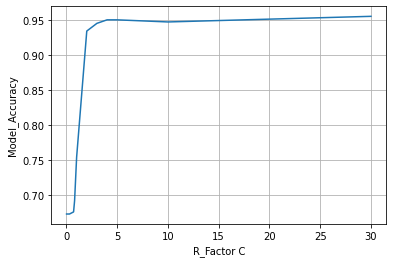

In [ ]:
x, y = find_features("ncrna_train.txt", type_of_dataset='train')
x_train, y_train, x_valid, y_valid = split_dataset(x, y, 0.50)
C = [0.01, 0.1, 0.3, 0.7, 0.8, 1, 2, 3, 4, 5, 10, 30]
Model_Accuracy_matrix = np.zeros((len(C), 2))
#defining our classifier
for i, Regularization_factor in enumerate(C):
    objective_func = svm.SVC(C = Regularization_factor, gamma = 0.01, kernel = 'linear', random_state = 0)
    objective_func.fit(x_train, y_train)
    Model_Accuracy = objective_func.score(x_valid, y_valid)
    Model_Accuracy_matrix[i,0] = Regularization_factor
    Model_Accuracy_matrix[i,1] = Model_Accuracy
plt.plot(Model_Accuracy_matrix[:,0], Model_Accuracy_matrix[:,1])
plt.grid()
plt.xlabel("R_Factor C")
plt.ylabel("Model_Accuracy")
best_index = np.argmax(Model_Accuracy_matrix[:,1])
print("Best Model Model_Accuracy Value: %.2f, Best Regularization Factor, C: %.2f"%(Model_Accuracy_matrix[best_index,1], Model_Accuracy_matrix[best_index,0]))

In [ ]:
x, y = find_features("ncrna_train.txt", type_of_dataset='train')
Model_Accuracy_matrix = np.zeros((5, 1))
train_idx, test_idx = kfold_cross_valid(x, 5)
#defining our classifier
for i in range(5):
    train_set=np.array(train_idx[i][:])
    test_set=np.array(test_idx[i][:])
    x_train=np.array(x[train_set])
    y_train=np.array(y[train_set])
    x_valid=np.array(x[test_set])
    y_valid=np.array(y[test_set])
    objective_func = svm.SVC(C = 30, gamma = 0.01, kernel = 'linear', random_state = 0)
    objective_func.fit(x_train, y_train)
    Model_Accuracy = objective_func.score(x_valid, y_valid)
    Model_Accuracy_matrix[i,0] = Model_Accuracy
print(Model_Accuracy_matrix)

[[0.9525]
 [0.9575]
 [0.945 ]
 [0.9375]
 [0.95  ]]


In [ ]:
x, y = find_features("ncrna_train.txt", type_of_dataset='train')
x_test, _ = find_features("ncrna_test.txt", type_of_dataset='test')
x_train, y_train, x_valid, y_valid = split_dataset(x, y, 0.50)
C = [0.01, 0.1, 0.3, 0.7, 0.8, 1, 5, 10, 30, 40, 50, 100]
Gamma_Value = [1e-4, 1e-3, 1e-2, 1e-1, 1, 2e-4, 2e-3, 2e-2, 2e-1, 2, 2e1, 2e2]
best_Gamma_Value = 0
Best_Regularization_Factor = 0
best_Model_Accuracy = 0
mat = np.zeros((len(C), len(Gamma_Value)))
C_counter = 0 
for Regularization_factor in C:
#    print("Regularisation: ", Regularization_factor)
    Model_Accuracy = np.zeros(5)
    j = 0
    for Gamma_Value_param in Gamma_Value:
#         print("Gamma:", gamma_param)
        objective_func = svm.SVC(C = Regularization_factor, gamma = Gamma_Value_param, kernel = 'rbf', random_state = 0)
        F_counter = 0 #counter for folds
        for train_index, test_index in kf.split(x_valid):
#             print("Fold: ", k)
            X_fold_train, X_fold_test = x_valid[train_index], x_valid[test_index]
            Y_fold_train, Y_fold_test = y_valid[train_index], y_valid[test_index]
            objective_func.fit(X_fold_train, Y_fold_train)
            Model_Accuracy[F_counter] = objective_func.score(X_fold_test, Y_fold_test)
            F_counter += 1
        mat[C_counter,j] = np.average(Model_Accuracy)
        j += 1
        print(Model_Accuracy)
    C_counter += 1  


[0.665 0.68  0.64  0.685 0.66 ]
[0.665 0.68  0.64  0.685 0.66 ]
[0.665 0.68  0.64  0.685 0.66 ]
[0.665 0.68  0.64  0.685 0.66 ]
[0.665 0.68  0.64  0.685 0.66 ]
[0.665 0.68  0.64  0.685 0.66 ]
[0.665 0.68  0.64  0.685 0.66 ]
[0.665 0.68  0.64  0.685 0.66 ]
[0.665 0.68  0.64  0.685 0.66 ]
[0.665 0.68  0.64  0.685 0.66 ]
[0.665 0.68  0.64  0.685 0.66 ]
[0.665 0.68  0.64  0.685 0.66 ]
[0.665 0.68  0.64  0.685 0.66 ]
[0.665 0.68  0.64  0.685 0.66 ]
[0.665 0.68  0.64  0.685 0.66 ]
[0.665 0.68  0.64  0.685 0.66 ]
[0.665 0.68  0.64  0.685 0.66 ]
[0.665 0.68  0.64  0.685 0.66 ]
[0.665 0.68  0.64  0.685 0.66 ]
[0.665 0.68  0.64  0.685 0.66 ]
[0.665 0.68  0.64  0.685 0.66 ]
[0.665 0.68  0.64  0.685 0.66 ]
[0.68  0.69  0.65  0.705 0.66 ]
[0.665 0.68  0.64  0.685 0.66 ]
[0.665 0.68  0.64  0.685 0.66 ]
[0.665 0.68  0.64  0.685 0.66 ]
[0.665 0.68  0.64  0.685 0.66 ]
[0.665 0.68  0.64  0.685 0.66 ]
[0.665 0.68  0.64  0.685 0.66 ]
[0.665 0.68  0.64  0.685 0.66 ]
[0.665 0.68  0.64  0.685 0.66 ]
[0.665 0

In [ ]:
print("Model Accuracy Matrix:\n")
print(mat)
C_counter, j = np.unravel_index(np.argmax(mat), mat.shape)
Best_Regularization_Factor = C[C_counter]
best_Gamma_Value = Gamma_Value[j]
print("\nC Value, Gamma Value: %.2f, Accuracy: %.2f"%(Best_Regularization_Factor, best_Gamma_Value, np.max(mat)))

Model Accuracy Matrix:

[[0.666 0.666 0.666 0.666 0.666 0.666 0.666 0.666 0.666 0.666 0.666 0.666]
 [0.666 0.666 0.666 0.666 0.666 0.666 0.666 0.666 0.666 0.666 0.677 0.666]
 [0.666 0.666 0.666 0.666 0.666 0.666 0.666 0.666 0.666 0.667 0.784 0.672]
 [0.666 0.666 0.666 0.666 0.725 0.666 0.666 0.666 0.666 0.862 0.86  0.738]
 [0.666 0.666 0.666 0.666 0.777 0.666 0.666 0.666 0.666 0.878 0.868 0.742]
 [0.666 0.666 0.666 0.666 0.869 0.666 0.666 0.666 0.666 0.921 0.88  0.757]
 [0.666 0.666 0.666 0.715 0.945 0.666 0.666 0.666 0.931 0.942 0.889 0.771]
 [0.666 0.666 0.666 0.934 0.945 0.666 0.666 0.666 0.946 0.941 0.884 0.771]
 [0.666 0.666 0.665 0.949 0.944 0.666 0.666 0.81  0.948 0.938 0.877 0.771]
 [0.666 0.666 0.673 0.949 0.942 0.666 0.666 0.904 0.949 0.936 0.878 0.771]
 [0.666 0.666 0.724 0.947 0.941 0.666 0.666 0.938 0.947 0.935 0.87  0.771]
 [0.666 0.666 0.938 0.948 0.943 0.666 0.666 0.952 0.949 0.939 0.861 0.771]]


TypeError: not all arguments converted during string formatting

<ipython-input-8-a66ad2d3f4a0>:2: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


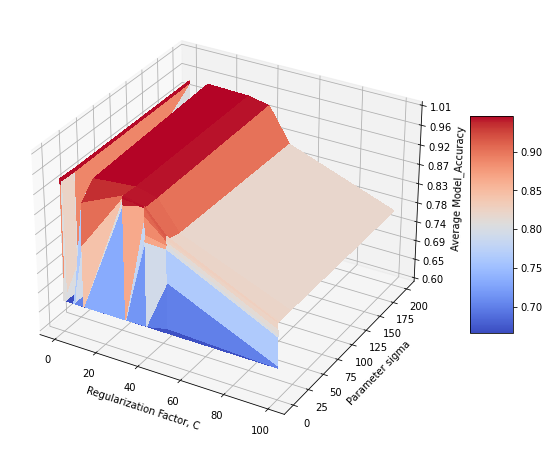

In [ ]:
fig = plt.figure(figsize=(10,8))
ax = fig.gca(projection='3d')
X, Y = np.meshgrid(C, Gamma_Value)
Z = mat.reshape(X.shape)
surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm, linewidth=0, antialiased=False)
ax.set_zlim(0.6, 1.01)
ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.2f'))
ax.set_xlabel("Regularization Factor, C")
ax.set_ylabel("Parameter sigma")
ax.set_zlabel("Average Model_Accuracy")
fig.colorbar(surf, shrink=0.5, aspect=5)
plt.show()

In [ ]:
outcome = np.zeros((1001, 9))
objective_func = svm.SVC(C = Best_Regularization_Factor, gamma = best_Gamma_Value, kernel = 'rbf', random_state = 0)
objective_func.fit(x, y)
# print('Optimal Intercept at : ', objective_func.intercept_)
pred_vector = objective_func.predict(x_test)
outcome[:,0] = pred_vector.astype('int')
outcome[:,1:9] = x_test
show_output(outcome)